# Import Basic Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt

# Import Data

In [5]:
df = pd.read_csv("fully cleaned kpop data.csv")

In [6]:
df.columns

Index(['fav_grp', 'popl_by_co_yn', 'reason', 'yr_listened', 'gender_pref',
       'daily_music_hr', 'watch_MV_yn', 'daily_MV_hr', 'obsessed_yn',
       'news_medium', 'pursuit', 'time_cons_yn', 'life_chg', 'pos_eff',
       'yr_merch_spent', 'money_src', 'concert_yn', 'crazy_ev', 'age',
       'country', 'job', 'gender', 'num_gr_like', 'bts_vs_others'],
      dtype='object')

In [7]:
# subset relevant columns for model

df_model = df[['popl_by_co_yn', 'reason', 'yr_listened', 'gender_pref',
       'daily_music_hr', 'watch_MV_yn', 'daily_MV_hr', 'obsessed_yn',
       'news_medium', 'pursuit', 'time_cons_yn', 'life_chg', 'pos_eff',
       'yr_merch_spent', 'money_src', 'concert_yn', 'crazy_ev', 'age',
       'country', 'job', 'gender', 'num_gr_like', 'bts_vs_others']]

In [8]:
# get dummy data to convert categorical variable into dummy/indicator variables
df_dum = pd.get_dummies(df_model)
df_dum

,yr_listened,daily_music_hr,daily_MV_hr,yr_merch_spent,age,num_gr_like,popl_by_co_yn_i'm not sure,popl_by_co_yn_its gaining popularity,popl_by_co_yn_no,popl_by_co_yn_yes,...,"country_others (south africa, new zealand, sweden, finland, turkey, caribbean)",country_uk,country_usa,job_full-time worker,job_student,job_unemployed,gender_female,gender_male,gender_transgender,bts_vs_others_bts
0,1.5,5.0,2.5,75,18,1,0,1,0,0,...,0,1,0,1,0,0,1,0,0,1
1,3.5,3.0,2.5,50,18,1,0,1,0,0,...,0,1,0,0,1,0,1,0,0,1
2,4.0,3.0,2.5,75,18,2,0,1,0,0,...,0,0,0,0,1,0,1,0,0,1
3,3.5,5.0,3.5,75,24,1,0,1,0,0,...,0,0,1,0,1,0,1,0,0,1
4,3.5,5.0,2.5,150,18,1,0,0,0,1,...,0,0,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,3.5,5.0,3.5,0,18,1,0,1,0,0,...,0,0,0,0,1,0,1,0,0,1
236,4.0,3.0,2.5,500,18,1,0,0,0,1,...,0,0,1,0,1,0,1,0,0,1
237,1.0,5.0,2.5,0,12,2,1,0,0,0,...,0,0,1,0,1,0,1,0,0,1
238,4.0,3.0,2.5,50,18,1,0,0,0,1,...,1,0,0,0,1,0,1,0,0,1


# Train and Test Split (80/20)

In [9]:
from sklearn.model_selection import train_test_split

X = df_dum.drop('daily_music_hr', axis = 1)
y = df_dum.daily_music_hr.values # creates an array - recommended to use for models

# 80/20 train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# Multiple Linear Regression

Using sklearn's linear regression

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# initialize the linear regression model
lm = LinearRegression()

# train the model
lm.fit(X_train, y_train)

# perform predicion on the test data
y_pred = lm.predict(X_test)

# performance metrics
print('Coefficients:', lm.coef_)
print('Intercept:', lm.intercept_)
print('Mean absolute error (MAE): %.2f' % mean_absolute_error(y_test, y_pred))

Coefficients: [ 0.00781768  0.13699177  0.00574065 -0.07329897  0.11862631  0.31594997
  0.80123676 -1.96057884  0.8433921  -2.50124975  0.57112248  1.3043756
  0.62575167  0.00719842 -0.18726413  0.26401237 -0.08394665  0.60653967
 -0.60653967 -0.13161908 -0.2271905   0.35880958 -0.11883467 -0.06692684
  0.18576151  0.07933676 -2.72013142  0.30424675 -0.63075664  0.8833308
  2.08397376  0.01393121 -0.2409122   0.22698099 -0.66461435 -0.08208277
  2.50349647 -0.87107398 -0.88572537  0.5205511  -0.43689613 -0.57362077
  0.4899658  -1.19078763 -0.0233225   0.10035434  0.53333056  0.58042523
  0.23305391 -0.10530671 -0.1277472  -0.33426188  0.26923996  0.06502192
 -0.2164026   0.21371175  0.45906971 -0.21961044 -0.18868365 -0.8225217
 -0.14817021  1.0375425   0.13779205 -0.25272741 -0.264368   -0.13801935
  0.40238735 -0.31485105 -0.17095967  0.48581072  0.        ]
Intercept: 3.490424829454292
Mean absolute error (MAE): 2.16


In [11]:
np.min(df.daily_music_hr)

0.5

Check MLR's performance using 10 fold Cross Validation

In [12]:
from sklearn.model_selection import cross_val_score

np.mean(cross_val_score(lm ,X_train, y_train, scoring = 'neg_mean_absolute_error', cv = 10))
# mean prediction is off by 1.98 hours

-1.9762961037820794

# [Lasso Regression (L1 Regularization)](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) 


In [13]:
from sklearn.linear_model import Lasso

lm_las = Lasso() # alpha defaults to 1
lm_las.fit(X_train,y_train)
np.mean(cross_val_score(lm_las, X_train, y_train, scoring = 'neg_mean_absolute_error', cv = 10))
# mean prediction is off by 1.58 hours

-1.5793841855417106

Find the optimal alpha

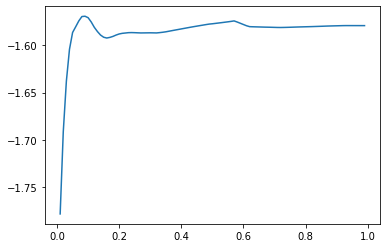

In [14]:
alpha = []
err = []

for i in range(1, 100):
  alpha.append(i/100)
  lmlas = Lasso(alpha = (i/100))
  err.append(np.mean(cross_val_score(lmlas, X_train, y_train, scoring = 'neg_mean_absolute_error', cv = 10)))

plt.plot(alpha,err)

In [15]:
err = tuple(zip(alpha,err))
df_err = pd.DataFrame(err, columns = ['alpha','err'])
df_err[df_err.err == max(df_err.err)]

,alpha,err
8,0.09,-1.569488


In [16]:
lm_las = Lasso(alpha = 0.09) # alpha defaults to 1
lm_las.fit(X_train,y_train)
np.mean(cross_val_score(lm_las, X_train, y_train, scoring = 'neg_mean_absolute_error', cv = 10))

-1.5694876958868378

# [Ridge Regression (L2 Regularization)](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

In [17]:
from sklearn.linear_model import Ridge
lm_rid = Ridge()
lm_rid.fit(X_train,y_train)
np.mean(cross_val_score(lm_rid, X_train, y_train, scoring = 'neg_mean_absolute_error', cv = 10))

-1.850441151935846

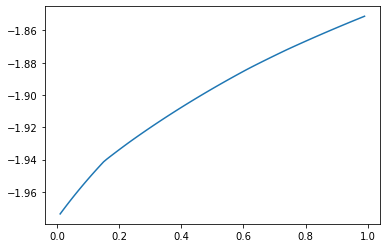

In [18]:
alpha = []
err = []

for i in range(1, 100):
  alpha.append(i/100)
  lmrid = Ridge(alpha = (i/100))
  err.append(np.mean(cross_val_score(lmrid, X_train, y_train, scoring = 'neg_mean_absolute_error', cv = 10)))

plt.plot(alpha,err)

# [Random Forest Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html?highlight=random%20forest#sklearn.ensemble.RandomForestRegressor)

In [19]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=2, random_state=0)

np.mean(cross_val_score(rf, X_train, y_train, scoring = 'neg_mean_absolute_error', cv= 10))

-1.6088319240192746

[Tune RF using GridsearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

In [20]:
from sklearn.model_selection import GridSearchCV

params = {'n_estimators':range(10,100,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}

gs_rf = GridSearchCV(rf, params ,scoring = 'neg_mean_absolute_error', cv = 10)
gs_rf.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=RandomForestRegressor(max_depth=2, random_state=0),
             param_grid={'criterion': ('mse', 'mae'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': range(10, 100, 10)},
             scoring='neg_mean_absolute_error')

In [21]:
gs_rf.best_score_

-1.5059671052631578

In [22]:
gs_rf.best_estimator_

RandomForestRegressor(criterion='mae', max_depth=2, n_estimators=80,
                      random_state=0)

# [XGBoost](https://xgboost.readthedocs.io/en/latest/)

In [23]:
from xgboost import XGBClassifier

# initialize the linear regression model
xgb = XGBClassifier()

# train the model
xgb.fit(X_train, y_train)

np.mean(cross_val_score(xgb ,X_train, y_train, scoring = 'neg_mean_absolute_error', cv = 10))

ModuleNotFoundError: No module named 'xgboost'

Tune XGBoost using GridSearchCV

In [ ]:
params = {'min_child_weight': [3, 5], 'gamma': [0.5, 1], 'subsample': [0.8, 1.0],
          'colsample_bytree': [0.6, 0.8], 'max_depth': [1,2]}

gs_xgb = GridSearchCV(xgb, params ,scoring = 'neg_mean_absolute_error', cv = 10)
gs_xgb.fit(X_train, y_train)

In [ ]:
gs_xgb.best_score_

In [ ]:
gs_xgb.best_estimator_

# Comparing model performances

In [ ]:
lm_pred = lm.predict(X_test)
lm_las_pred = lm_las.predict(X_test)
lm_rid_pred = lm_rid.predict(X_test)
rf_pred = gs_rf.best_estimator_.predict(X_test)
xgb_pred = gs_xgb.best_estimator_.predict(X_test)

In [ ]:
print("MLR MAE: ", mean_absolute_error(y_test, lm_pred))
print("Lasso Regression MAE: ", mean_absolute_error(y_test, lm_las_pred))
print("Ridge Regression MAE: ", mean_absolute_error(y_test, lm_rid_pred))
print("Random Forest MAE: ", mean_absolute_error(y_test, rf_pred))
print("XGBoost MAE: ", mean_absolute_error(y_test, xgb_pred))